- 数据介绍

这是一个跨国数据，其中包含2010年1月12日至2011年12月9日期间在英国注册的非商店在线零售业务中发生的所有交易。该公司主要销售独特的全场礼品。许多客户是该公司的批发商

- 户消费行为趋势
    - 用户个体消费分析 
    - 用户消费行为分析 
    - 留存率分析

### 理解数据

本数据集共**条左右数据,共计8个字段,分别是：
- 发票号码
- 产品代码
- 描述
- 数量
- 发票日期
- 单价
- 顾客ID
- 国家

### 数据清洗

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

#### 数据加载

In [2]:
columns = ['发票号码','产品代码','描述','数量','发票日期','单价','顾客ID','国家']

dateparse = lambda dates: pd.datetime.strptime(datas,'%Y/%m/%d')

df = pd.read_csv(r'./data/data.csv',sep=',',encoding='ISO-8859-1')

In [5]:
df.head()

发票号码    产品代码                                   描述  数量            发票日期  \
0  536365  85123A   WHITE HANGING HEART T-LIGHT HOLDER   6  12/1/2010 8:26   
1  536365   71053                  WHITE METAL LANTERN   6  12/1/2010 8:26   
2  536365  84406B       CREAM CUPID HEARTS COAT HANGER   8  12/1/2010 8:26   
3  536365  84029G  KNITTED UNION FLAG HOT WATER BOTTLE   6  12/1/2010 8:26   
4  536365  84029E       RED WOOLLY HOTTIE WHITE HEART.   6  12/1/2010 8:26   

     单价     顾客ID              国家  
0  2.55  17850.0  United Kingdom  
1  3.39  17850.0  United Kingdom  
2  2.75  17850.0  United Kingdom  
3  3.39  17850.0  United Kingdom  
4  3.39  17850.0  United Kingdom

In [4]:
df.columns = columns

- 目前的指标不需要时间，故将时间剔除

In [4]:
datetime = df.发票日期.str.split(' ')

In [5]:
datetime.head()

0    [12/1/2010, 8:26]
1    [12/1/2010, 8:26]
2    [12/1/2010, 8:26]
3    [12/1/2010, 8:26]
4    [12/1/2010, 8:26]
Name: 发票日期, dtype: object

In [6]:
date1 = []
time1 = []
for i in datetime:
    date1.append(i[0])
    time1.append(i[1])

In [7]:
df['fp_date'] = date1
df['fp_time'] = time1


In [8]:
df['fp_date'] = df.fp_date.apply(lambda dates: pd.datetime.strptime(dates,'%m/%d/%Y'))
df['fp_time'] = df.fp_time.apply(lambda dates: pd.datetime.strptime(dates,'%H:%M'))

#### 数据探索

In [6]:
print(df.info())
print('-'*30)
print(df.isnull().sum())
print('-'*30)
print(df.describe())
print('-'*30)
# print(df.head())
print('-'*30)
print(df.tail())
print('-'*30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
发票号码    541909 non-null object
产品代码    541909 non-null object
描述      540455 non-null object
数量      541909 non-null int64
发票日期    541909 non-null object
单价      541909 non-null float64
顾客ID    406829 non-null float64
国家      541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
------------------------------
发票号码         0
产品代码         0
描述        1454
数量           0
发票日期         0
单价           0
顾客ID    135080
国家           0
dtype: int64
------------------------------
                  数量             单价           顾客ID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000 

通过数据探索我们发现:
    - 大部分订单只购买了少量商品（平均9.5），有极值干扰 
    - 输入呈现右分布

In [24]:
# 我们将数据中的负数去除（可能是钱款未到位或是退款造成的）
# 顾客ID为空的是未注册客户，我们暂且将它们清除
df = df[df.顾客ID.isnull() == False]
df = df[df.数量 > 0]

In [25]:
# 增加指标，各单的消费总金额
df['支付金额'] = df.数量 * df.单价

### 用户消费趋势

#### 每月用户的产品购买数量

In [26]:
df.set_index('fp_date',inplace=True)

In [27]:
month_num = df.resample('M').数量.sum()

In [28]:
writer = pd.ExcelWriter('./data/result_map.xlsx')
def datasave(data,sname):
    data.to_excel(excel_writer=writer,sheet_name=sname)
    writer.save()
    writer.close()

In [29]:
datasave(month_num,'周购买数')

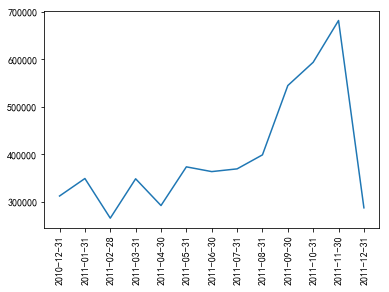

In [30]:
data1 = [str(i).split(' ')[0] for i in month_num.index]
plt.plot(month_num.values)

plt.xticks(range(len(month_num.index)),data1,rotation=90)
plt.show()

从图中可以看到，销量在前几个月起伏比价厉害，而后出现持续递增的情况，9月份到11月份持续增长，应该是双十一的缘故，而后12月份出现消费疲惫的现象，都属于消费的正常现象

#### 每月消费的金额

In [31]:
month_price = df.resample('M').支付金额.sum()

In [32]:
datasave(month_price,'月消费额')

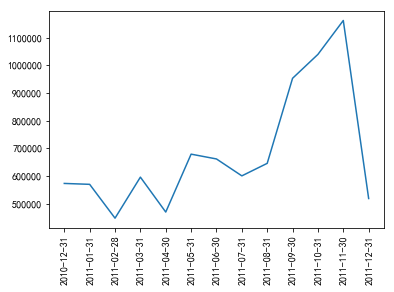

In [33]:
data1 = [str(i).split(' ')[0] for i in month_price.index]
plt.plot(month_price.values)

plt.xticks(range(len(month_price.index)),data1,rotation=90)
plt.show()

- 我们可以开出来，销量与销售价格走势基本是相同的，故而估测消费群体应该是基本一类的，因为几乎没有人消费售价过高或是过低的商品

#### 每月消费次数

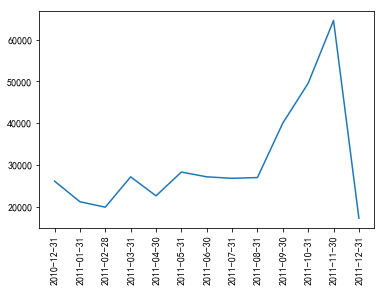

In [34]:
mont_count = df.resample('M').发票号码.count()
data1 = [str(i).split(' ')[0] for i in mont_count.index]
plt.plot(mont_count.values)

plt.xticks(range(len(mont_count.index)),data1,rotation=90)
plt.show()
datasave(mont_count,'月购单数')

- 前9个月平均订单数在25000单左右，后续两月猛然增长，最后一个月陡然下跌。

#### 每月消费人数

In [35]:
month_r_num = df.resample('M').顾客ID.apply(lambda x: len(x.drop_duplicates()))

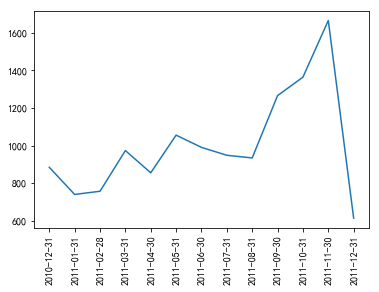

In [78]:
data1 = [str(i).split(' ')[0] for i in month_r_num.index]
plt.plot(month_r_num.values)
plt.xticks(range(len(month_r_num.index)),data1,rotation=90)
plt.show()
datasave(month_r_num,'月消费人数')

- 每月消费人数远低于每月消费次数，差异相当大。
- 我么可以看出他依然与销量的相辅的趋势，说明在我么并不只是在增加消费次数。

### 用户个体消费分析

In [37]:
df.reset_index(inplace=True)

In [38]:
group_user = df.groupby('顾客ID',as_index=True)
group_user_sum = group_user.sum()

In [ ]:
group_user_sum.describe()

从用户角度
- 用户数量：4339
- 平均购买1194，但中位数仅有379,且有大批发用户购买了197491多件商品

从消费金额角度
- 用户平均消费2000元左右，中位却只有674,消费金额最多的用户280206元，平均数仅和75分位接近，索引肯定存在小部分的高频消费用户

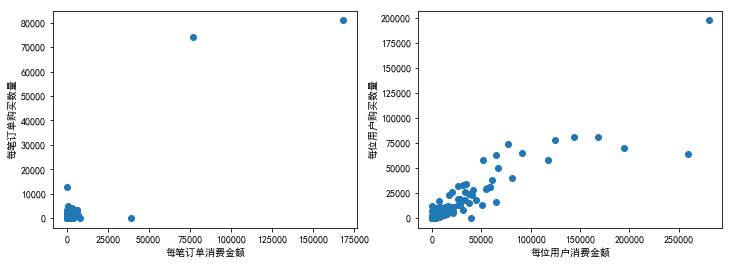

In [40]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(x = '支付金额', y = '数量',data=df)
plt.xlabel('每笔订单消费金额')
plt.ylabel('每笔订单购买数量')

plt.subplot(122)
plt.scatter(x = '支付金额',y='数量',data=group_user.sum())
plt.xlabel('每位用户消费金额')
plt.ylabel('每位用户购买数量')
plt.show()

从每笔订单的散点图观察

- 每个商品均价在4元左右，极值单较少，所以不是造成异常波动的原因

从每位用户的消费散点图观察
- 离群点较少，影响波动的效果也可以忽略不计

#### 用户消费分布图

In [41]:

datasave(group_user_sum,'用户个体数据')

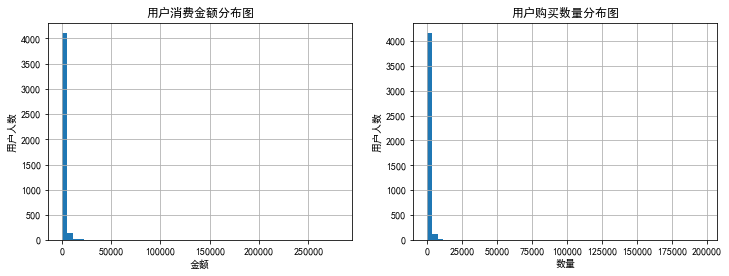

In [42]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
ax = group_user.支付金额.sum().hist(bins=50)
ax.set_xlabel('金额')
ax.set_ylabel('用户人数')
# ax.set_xlim(0, 2000)
ax.set_title('用户消费金额分布图')

plt.subplot(122)
ax1 = group_user.数量.sum().hist(bins=50)

ax1.set_xlabel('数量')
ax1.set_ylabel('用户人数')
# ax1.set_xlim(0, 150)
ax1.set_title('用户购买数量分布图')
plt.show()

我们现在可以将离群点付给均值，亦可以做到最大限度不影响大部分数据偏差

In [43]:
df = df[(df['数量'] < 10000) | (df['支付金额'] < 25000)]

In [44]:
group_user_sum = group_user_sum[(group_user_sum['数量'] < 75000) | (group_user_sum['支付金额'] < 200000)]

#### 用户累计消费金额的占比

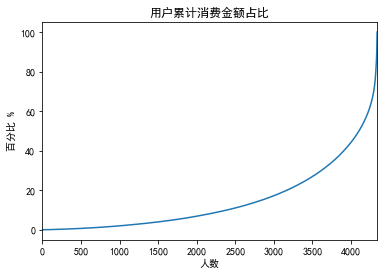

In [45]:
user_cumsum = group_user_sum.sort_values('支付金额').apply(lambda x:(x.cumsum() / x.sum())*100)
user_cumsum.reset_index().支付金额.plot()
plt.title('用户累计消费金额占比')
plt.xlabel('人数')
plt.ylabel('百分比 %')
plt.show()

通过分析累计销售额占比，从图中不难看出用户消费行为基本符合二八定律，80% 的用户贡献了 25% 的消费金额，而%60的消费由后500名用户贡献，所以只要维护了这500 名用户,就能完成 60% 的KPI。

### 用户消费行为

- 用户第一次消费（首购）时间
- 用户最后一次消费时间
- 用户分层
    - RFM （RFM模型是衡量客户价值和客户创利能力的重要工具和手段）
    - 新、老、活跃、回流、流失
- 用户购买周期（按订单）
    - 用户消费周期描述
    - 用户消费周期分布
- 用户生命周期（按第一次&最后一次消费）
    - 用户生命周期描述
    - 用户生命周期分布


#### 用户首购时间

In [46]:
shou_gou = group_user.fp_date.min().value_counts()

In [47]:
datasave(shou_gou,'首购')

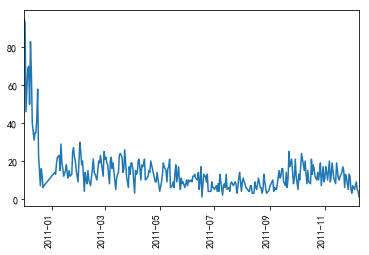

In [48]:
shou_gou.plot(rot='90')

#### 用户最后一次购买

In [49]:
zhui_gou = group_user.fp_date.max().value_counts()

In [50]:
datasave(zhui_gou,'最后购买')

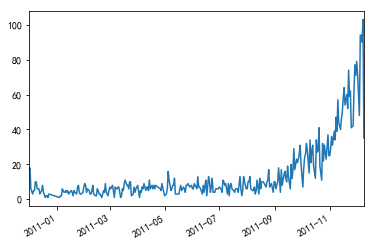

In [51]:
zhui_gou.plot()
plt.show()

通过以上维度可以看出： 
- 用户首购出现在前1个月加多，而最后一次购买呈现主键递增，说明用户购买行为比较不错

#### 构建RFM模型

In [52]:
rfm = df.pivot_table(index='发票号码',
                    values=['支付金额','数量','fp_date'],
                     aggfunc={
                         'fp_date':'max',
                         '数量':'sum',
                         '支付金额':'sum'
                     }
                    )

In [53]:
rfm.head()

fp_date    支付金额  数量
发票号码                         
536365 2010-12-01  139.12  40
536366 2010-12-01   22.20  12
536367 2010-12-01  278.73  83
536368 2010-12-01   70.05  15
536369 2010-12-01   17.85   3

In [54]:
rfm['R'] = -(rfm.fp_date - rfm.fp_date.max()) / np.timedelta64(1,'D')

In [55]:
rfm.rename(columns= {
    '数量':'F',
    '支付金额':'M'
},inplace=True)

In [56]:
rfm.

SyntaxError: invalid syntax (<ipython-input-56-1175d2b360c8>, line 1)

In [57]:
def rfm_func(x):
    level = x.apply(lambda x:'1' if x>=1 else '0')
    
    label = level.R + level.F + level.M
    
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'
    }
    
    result = d[label]
    
    return result

rfm['label'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)    

In [58]:
rfm.head()

fp_date       M   F      R   label
发票号码                                        
536365 2010-12-01  139.12  40  373.0  一般挽留客户
536366 2010-12-01   22.20  12  373.0  一般挽留客户
536367 2010-12-01  278.73  83  373.0  一般挽留客户
536368 2010-12-01   70.05  15  373.0  一般挽留客户
536369 2010-12-01   17.85   3  373.0  一般挽留客户

In [59]:
rfm.groupby('label').count()

fp_date     M     F     R
label                            
一般价值客户      588   588   588   588
一般保持客户      845   845   845   845
一般发展客户     6293  6293  6293  6293
一般挽留客户     6141  6141  6141  6141
重要价值客户     1545  1545  1545  1545
重要保持客户     2045  2045  2045  2045
重要发展客户      549   549   549   549
重要挽留客户      528   528   528   528

In [60]:
datasave(rfm,'RFM')

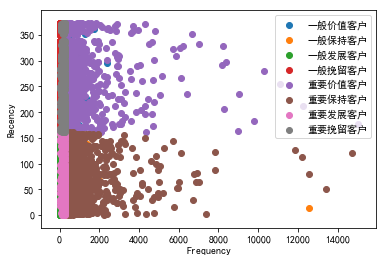

In [61]:
for label,grouped in rfm.groupby('label'):
    x = grouped['F']
    y = grouped['R']
    
    plt.scatter(x,y,label=label)
plt.legend(loc='best')
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.show()    

从 RFM 分层可知，大部分用户为一般发展客户	，但这是因为极值存在，所以 FRM 的划分应按照业务为准划分